<a href="https://colab.research.google.com/github/smitgol/full-contact-tasks/blob/main/full_contact_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import types
import pyspark.sql.functions as sf
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
pandas_df = pd.read_csv('police_pedestrian_stops_and_vehicle_stops.csv')
df = spark.createDataFrame(pandas_df)

In [ ]:
df.show()

In [ ]:
most_eventfull_df = df.groupby('NEIGHBORHOOD_NAME').agg({"PROBLEM":"count"}).orderBy("count(PROBLEM)", ascending=False)

In [ ]:
most_eventfull_df.write.csv('most_eventfull_neighborhood.csv', header=True)

In [ ]:
df.groupby('NEIGHBORHOOD_NAME').agg({"PROBLEM":"count"}).orderBy("count(PROBLEM)", ascending=False).head(10)

[Row(NEIGHBORHOOD_NAME='Five Points', count(PROBLEM)=50915),
 Row(NEIGHBORHOOD_NAME='Montbello', count(PROBLEM)=46849),
 Row(NEIGHBORHOOD_NAME='Stapleton', count(PROBLEM)=38157),
 Row(NEIGHBORHOOD_NAME='West Colfax', count(PROBLEM)=36818),
 Row(NEIGHBORHOOD_NAME='Globeville', count(PROBLEM)=34460),
 Row(NEIGHBORHOOD_NAME='East Colfax', count(PROBLEM)=31318),
 Row(NEIGHBORHOOD_NAME='Westwood', count(PROBLEM)=30682),
 Row(NEIGHBORHOOD_NAME='Baker', count(PROBLEM)=30577),
 Row(NEIGHBORHOOD_NAME='CBD', count(PROBLEM)=28997),
 Row(NEIGHBORHOOD_NAME='Barnum', count(PROBLEM)=27512)]

In [ ]:
df = df.withColumn("TIME_PHONEPICKUP", df.TIME_PHONEPICKUP.cast(types.DateType()))

In [ ]:
group_by_df = df.groupby(sf.year('TIME_PHONEPICKUP')).agg({"PROBLEM":"count"})

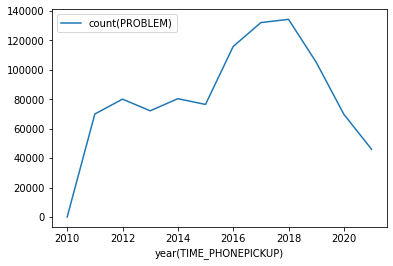

In [ ]:
pdf = (
    group_by_df.select(
        "year(TIME_PHONEPICKUP)",
        "count(PROBLEM)",
    )
    .orderBy("year(TIME_PHONEPICKUP)")
    .toPandas()
)

pdf.plot.line(x="year(TIME_PHONEPICKUP)", y="count(PROBLEM)")

In [ ]:
pie_chart = (df.groupby("PROBLEM").agg({"PROBLEM":"count"}).select("PROBLEM","count(PROBLEM)").toPandas())
pie_chart

,PROBLEM,count(PROBLEM)
0,Vehicle Stop,731227
1,Subject Stop,252126


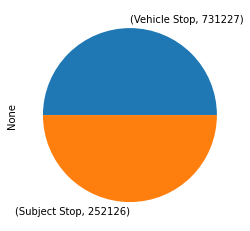

In [ ]:
pie_chart.value_counts().plot(kind="pie", y="PROBLEM")